In [1]:
%pip install hdbscan

     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB 991.0 kB/s eta 0:00:06
     - -------------------------------------- 0.1/5.2 MB 2.1 MB/s eta 0:00:03
     -- ------------------------------------- 0.3/5.2 MB 2.4 MB/s eta 0:00:03
     --- ------------------------------------ 0.4/5.2 MB 2.8 MB/s eta 0:00:02
     ---- ----------------------------------- 0.6/5.2 MB 3.0 MB/s eta 0:00:02
     ----- ---------------------------------- 0.7/5.2 MB 3.4 MB/s eta 0:00:02
     ------- -------------------------------- 0.9/5.2 MB 3.7 MB/s eta 0:00:02
     -------- ------------------------------- 1.2/5.2 MB 3.9 MB/s eta 0:00:02
     ---------- ----------------------------- 1.4/5.2 MB 4.2 MB/s eta 0:00:01
     ------------ --------------------------- 1.6/5.2 MB 4.6 MB/s eta 0:00:01
     -------------- ------------------------- 1.9/5.2 MB 4.6 MB/s eta 0:00:01
     ---------------- ----------------------- 2.1/5.2 MB 4.8 MB/s eta


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hdbscan

from sklearn.cluster import OPTICS, DBSCAN

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

In [3]:
test_data = pd.read_csv('09-Mall_Customers.csv', encoding='Latin-1') 
test_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
test_data = test_data.iloc[:,[3,4]].values

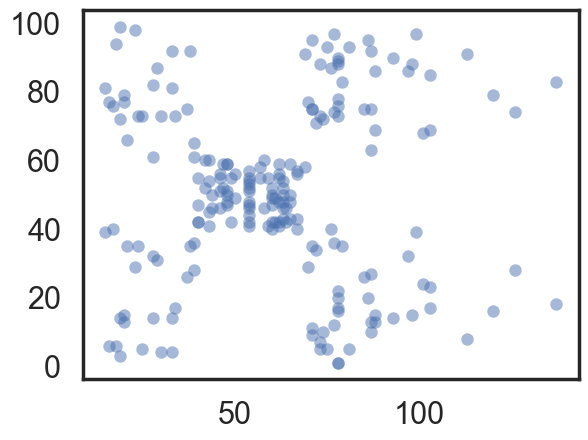

In [5]:
plt.scatter(test_data[:,0], test_data[:,1], color='b', **plot_kwds)

In [6]:
clusterer1 = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
clusterer1.fit(test_data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=3)

In [7]:
clusterer2 = hdbscan.HDBSCAN(min_cluster_size=6, gen_min_span_tree=True)
clusterer2.fit(test_data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=6)

In [8]:
clusterer3 = hdbscan.HDBSCAN(min_cluster_size=9, gen_min_span_tree=True)
clusterer3.fit(test_data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=9)

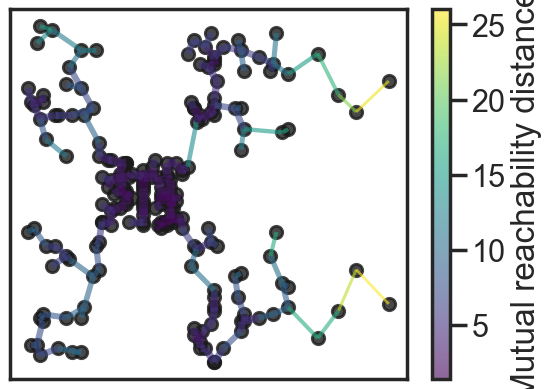

In [9]:
clusterer1.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)
plt.show()

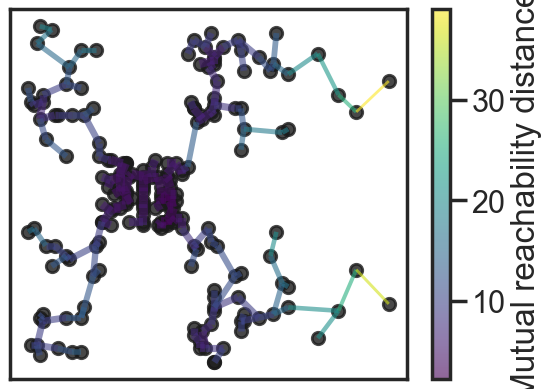

In [10]:
clusterer2.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)
plt.show()

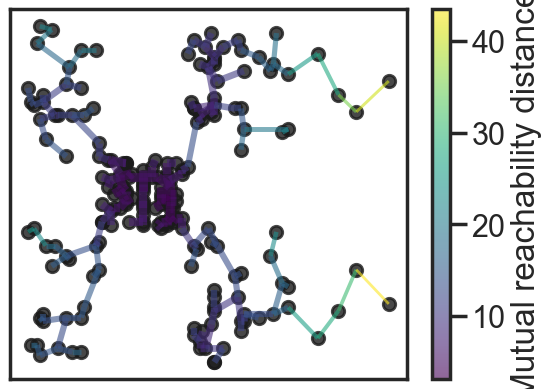

In [11]:
clusterer3.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)
plt.show()

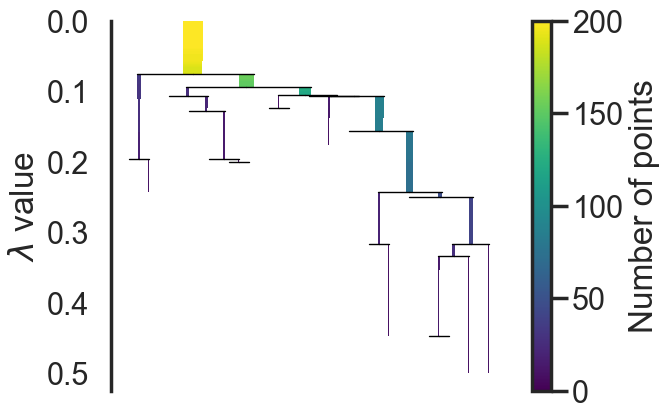

In [12]:
clusterer1.condensed_tree_.plot()
plt.show()

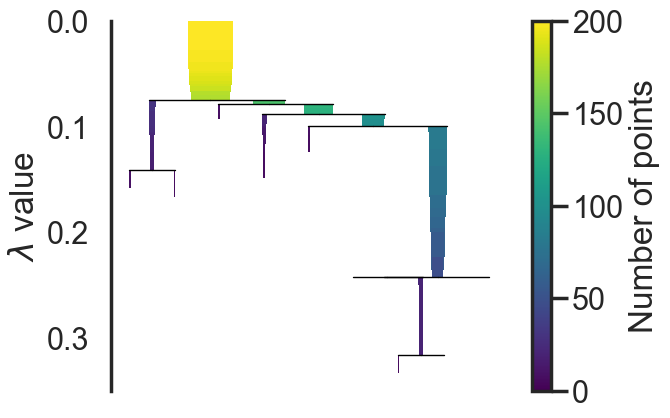

In [13]:
clusterer2.condensed_tree_.plot()
plt.show()

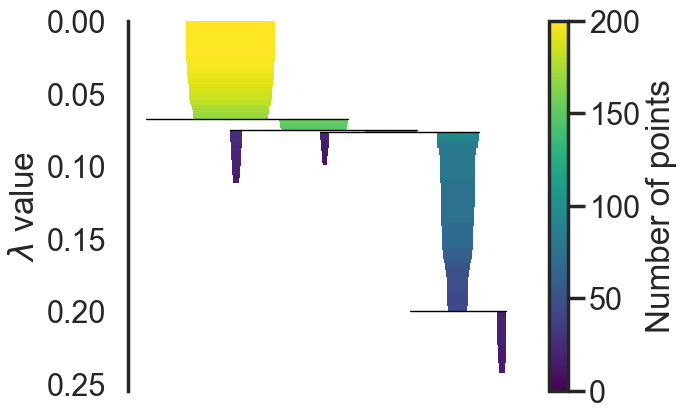

In [14]:
clusterer3.condensed_tree_.plot()
plt.show()

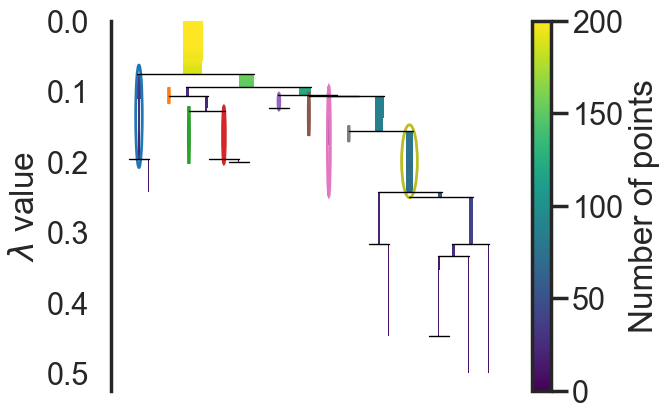

In [15]:
clusterer1.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

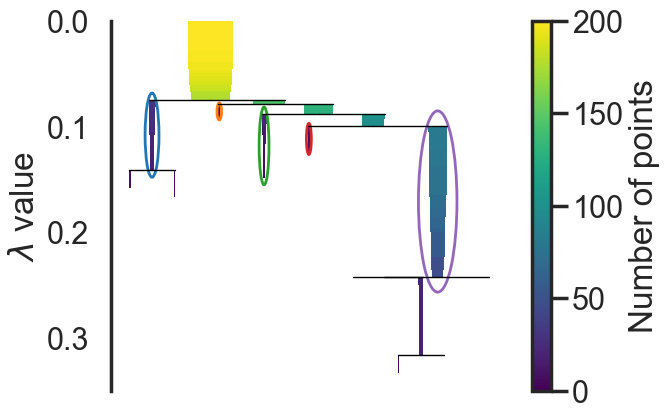

In [16]:
clusterer2.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

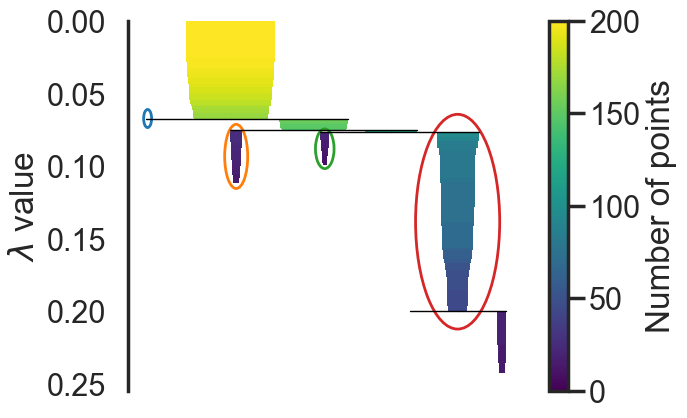

In [17]:
clusterer3.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

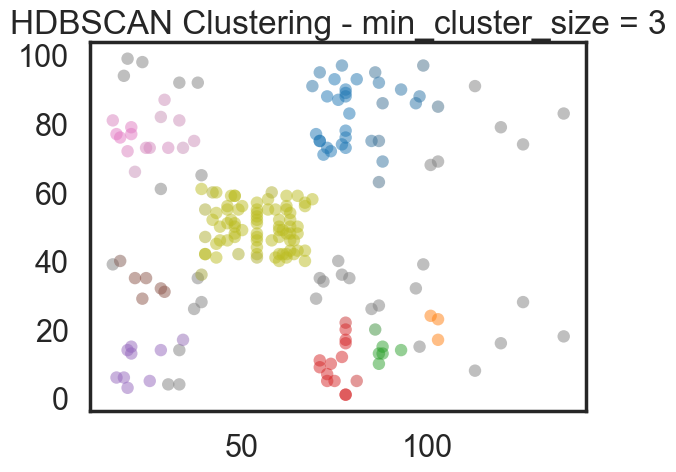

In [18]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer1.labels_, clusterer1.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering - min_cluster_size = 3")
plt.show()

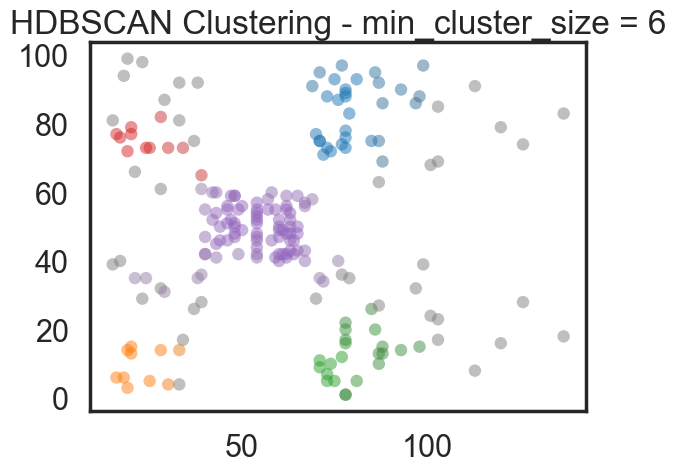

In [19]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer2.labels_, clusterer2.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering - min_cluster_size = 6")
plt.show()

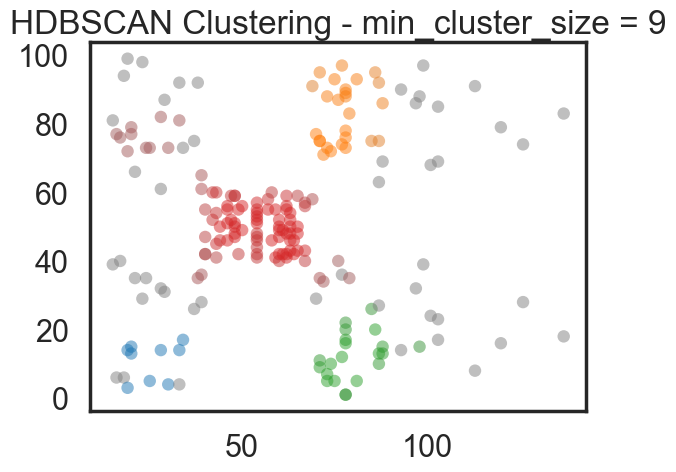

In [20]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer3.labels_, clusterer3.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering - min_cluster_size = 9")
plt.show()